In [1]:
### Note new packages that we are importing!!
from cartopy import crs as ccrs, feature as cfeature        ## for plotting geo spatial data
import cmocean                    ## for nice colormaps.
import matplotlib.path as mpath   ## needed for nice looking polar projections.
import momlevel as ml             ## for computing annual mean and seasonal cycle.
import matplotlib.pyplot as plt
import zarr
import xarray as xr
import numpy as np

In [2]:
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6

### Load in our observations of Sea Ice Concentration from the NOAA OI SST V2 High Resolution Dataset from September 1981 to September 2023 on a 1/4 - degree grid. Here we load in the dataset in as a Zarr store instead of a netcdf file since the dataset is high-resolution (you do not need to know the details of this now). To load in Zarr format data, we use Xarray's `xr.open_zarr()` method instead of `xr.open_dataset`.

### We also load in a file that contains the pre-computed grid cell area for our dataset:



In [4]:
ees_climate_dir = 'C:/Users/TU_Climate24_Student/Desktop/ees_climate/'
seaice_observations = xr.open_zarr(ees_climate_dir+'unit3/data/seaice_concentration_data')
seaice_gridcell_area = xr.open_dataset(ees_climate_dir+'unit3/data/cell_area_seaiceconc.nc')

### Function for creating nice looking NorthPolarStereo projections:

In [5]:
def North_Polar(array,vmin,vmax,cmap):
    subplot_kws = dict(projection=ccrs.NorthPolarStereo()) 
    fig, ax = plt.subplots(figsize=[10, 5],subplot_kw=subplot_kws)
    
    array.plot(ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=vmin,
               vmax=vmax,
               extend='both',
               cmap=cmap,levels=30)

    # Limit the map to -50 degrees latitude and below.
    ax.set_extent([-180, 180, 50, 90], ccrs.PlateCarree())
    
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    ax.coastlines()

### Function for creating nice looking SouthPolarStereo projections:

In [6]:
def South_Polar(array,vmin,vmax,cmap):
    subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
    fig, ax = plt.subplots(figsize=[10, 5],subplot_kw=subplot_kws)
    
    array.plot(ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=vmin,
               vmax=vmax,
               extend='both',
               cmap=cmap, levels=30)

    # Limit the map to -50 degrees latitude and below.
    ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    ax.coastlines()

### Create a global map using a nice - projection of the time-averaged (Sept 1981 to Sept 2022, full dataset) sea ice concentration. 
* #### Add coastlines to your plot to distinguish land using `ax.coastlines()`.
* #### Make sure to choose appropriate vmin & vmax values for your color bar.
* #### Choose a global projection that is reasonable to display the data .....
  * Explore the Robinson, EckertIV, and other projections.
* #### Choose an appropriate color map to display the data.
  * cmocean maps here: https://matplotlib.org/cmocean/ (hint: what is the data you are displaying??)

### For a full list of projections available via Cartopy please use this reference: https://scitools.org.uk/cartopy/docs/latest/reference/projections.html#platecarree

### Use Xarray's `.groupby()` method and the polar projection function given above to create a polar projection of Northern Hemisphere wintertime-averaged Arctic sea ice averaged over the full time period of observations:

CPU times: total: 23.4 s
Wall time: 18.3 s


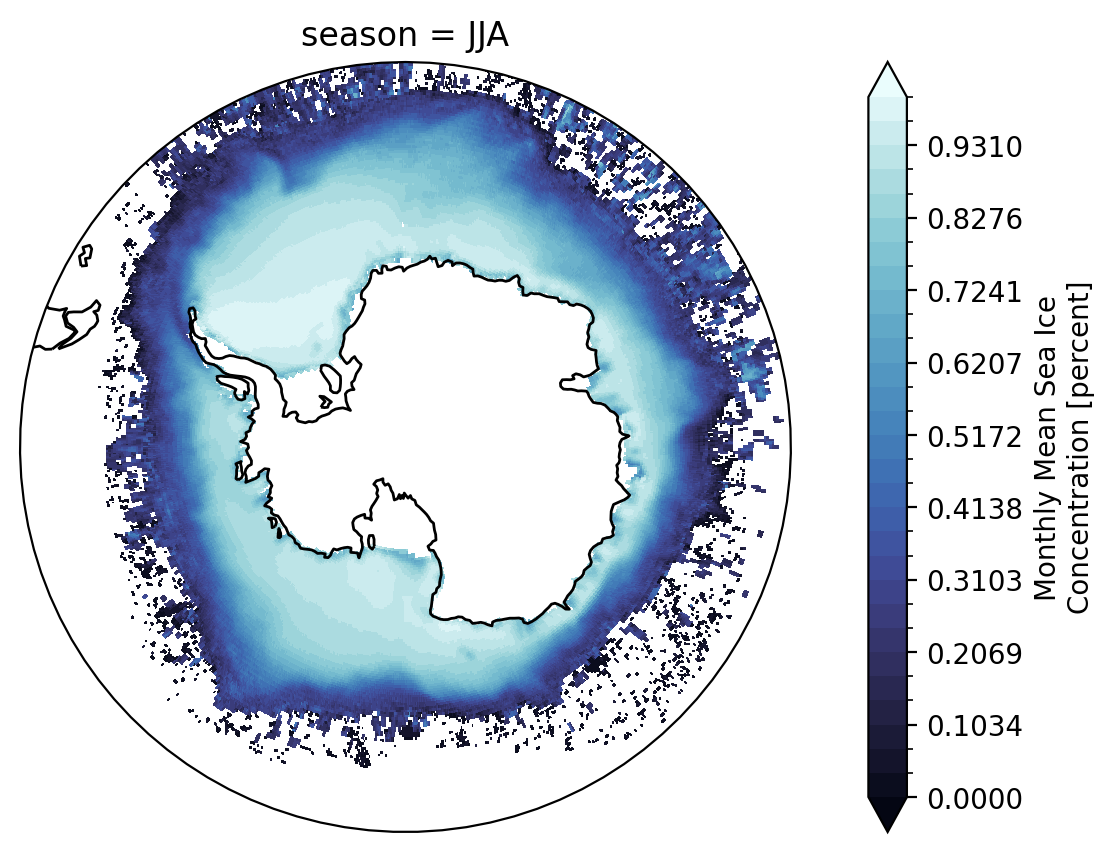

In [19]:
%%time
seasons = seaice_observations.icec.groupby('time.season').mean(dim='time')
South_Polar(seasons.sel(season='JJA'),0,1,cmap=cmocean.cm.ice)

CPU times: total: 22.9 s
Wall time: 18.2 s


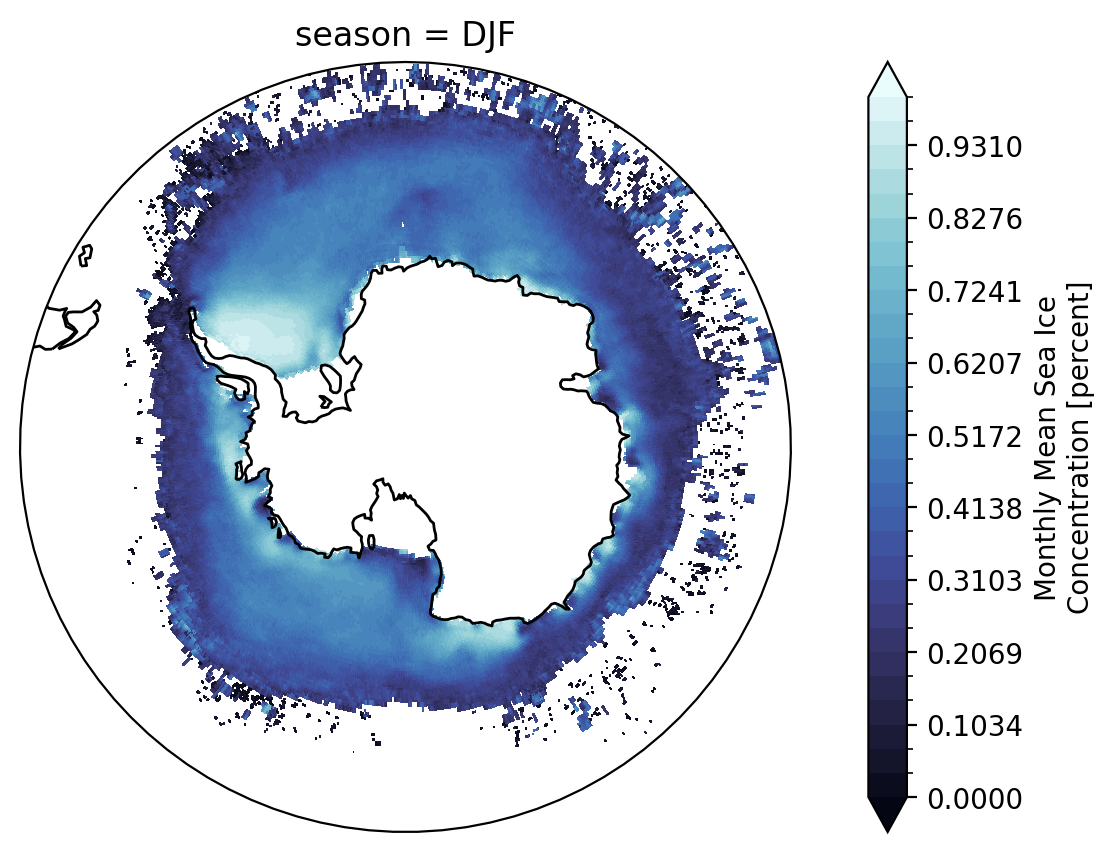

In [20]:
%%time
seasons = seaice_observations.icec.groupby('time.season').mean(dim='time')
South_Polar(seasons.sel(season='DJF'),0,1,cmap=cmocean.cm.ice)

### Use Xarray's `.groupby()` method and the polar projection function given above to create a polar projection of Northern Hemisphere summertime-averaged Arctic sea ice averaged over the full time period of observations:

### Use Xarray's `.groupby()` method and the polar projection function given above to create a polar projection of Southern Hemisphere wintertime-averaged Arctic sea ice averaged over the full time period of observations:

### Use Xarray's `.groupby()` method and the polar projection function given above to create a polar projection of Southern Hemisphere summertime-averaged Arctic sea ice averaged over the full time period of observations:

## Sea Ice Extent Analysis

#### Total Sea Ice Extent (SIE) in million km^2 is a metric that climate scientists commonly use to monitor sea ice. SIE is computed as:
* The __sum of__ the (fractional sea ice coverage (concentration) * the grid cell area covered by sea ice) = m^2
* Convert m^2 to km^2

#### You have loaded in two datasets that will allow you to do this calculation and reproduce the following plot of the seasonal cycle for Arctic SIE. Produce a plot of Arctic SIE: 
* With the 1982 to 2010 time-average as a thick dashed line
* Use Xarray's `.std()` method to compute the standard deviation (this is just like you did for `.mean(dim='time')`, except your method is now `.std(dim='time')` and place two thin lines on your plot that indicate the 1982 to 2010 time-average + 2 standard deviations and the 1982 to 2010 time-average + 2 standard deviations.
* A thick red line for the annual-cycle of SIE for 2012
* Lines for 2020 and 2021.
* Your x-axis should be in actual months, not integers.

*** Hints: 
* This will involve some slicing in space and time!
* Use Xarray's `.groupby('time.month').mean(dim='time')` method to take your 1982 to 2010 data to an annual / seasonal cycle!
* You can also use .std(dim='time') .....
* Make sure you are checking your DataArrays that you are calculating to make sure you know what you are plotting / the regions / dimensions / etc .... when in doubt, print your array!
* You do not have to do this for this assignment ..... but you can also using ax.fill_between()... specifying your x and y axes just like you did using a Pandas array in our Unit3 module and shade your standard deviations about your mean ....


![](https://eoimages.gsfc.nasa.gov/images/imagerecords/147000/147306/arctic_nsidc_2020259_plot.png)

## Repeat the above excercise but for Antarctic Sea Ice ... 

### Use Xarray's `.groupby()` method and the polar projection function given above to create a polar projection of sea ice concentration for the month when Antarctic sea ice extent is at its maximum ...

### Use Xarray's `.groupby()` method and the polar projection function given above to create a polar projection of sea ice concentration for the month when Antarctic sea ice extent is at its minimum ...

### Use Xarray's `.groupby()` method and the polar projection function given above to create a polar projection of sea ice concentration for the month when Arctic sea ice extent is at its minimum ...

### Use Xarray's `.groupby()` method and the polar projection function given above to create a polar projection of sea ice concentration for the month when Arctic sea ice extent is at its maximum ...